In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

In [2]:
# Configuration options
num_samples_total = 1000
cluster_centers = [(5,5), (3,3), (1,1)]
num_classes = len(cluster_centers)
# Generate data
X, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, cluster_std = 0.3)
np.save('./clusters.npy', X)
X = np.load('./clusters.npy')

In [3]:
# Estimate bandwith
bandwidth = estimate_bandwidth(X, n_samples=500)
# Fit Mean Shift with Scikit
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(X)


MeanShift(bandwidth=0.8458461509319846)

In [4]:
labels = meanshift.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
# Predict the cluster for all the samples
P = meanshift.predict(X)

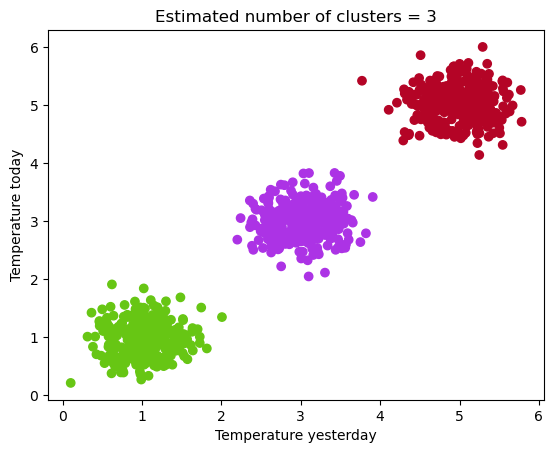

In [6]:
# Generate scatter plot for training data
colors = list(map(lambda x: '#AC33E5' if x == 1 else '#b40426' if x == 2 else '#67c614', P))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('Temperature yesterday')
plt.ylabel('Temperature today')
plt.show()